# Improved Euler Method (Heun’s Method)

The Improved Euler method (also known as Heun’s method) is a two-stage Runge–Kutta method.

It improves upon the standard Euler method by taking the average of slopes:

$$
y_{n+1} = y_n + \frac{h}{2} \big( f(t_n, y_n) + f(t_{n+1}, y_n + h f(t_n, y_n)) \big)
$$

This provides higher accuracy compared to Euler’s method, while still being simple to implement.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def heun(f, t0, y0, h, n):
    """
    Implements Improved Euler (Heun's Method).

    Parameters:
    f  : function, derivative f(t, y)
    t0 : initial time
    y0 : initial condition
    h  : step size
    n  : number of steps

    Returns:
    t_values, y_values : arrays of computed time and y values
    """
    t_values = np.zeros(n+1)
    y_values = np.zeros(n+1)

    t_values[0] = t0
    y_values[0] = y0

    for i in range(n):
        # Predictor step (Euler’s estimate)
        y_predict = y_values[i] + h * f(t_values[i], y_values[i])
        # Corrector step (average slope)
        y_values[i+1] = y_values[i] + (h/2) * (f(t_values[i], y_values[i]) + f(t_values[i] + h, y_predict))
        t_values[i+1] = t_values[i] + h

    return t_values, y_values

In [4]:
# Example: dy/dt = y, y(0) = 1
f = lambda t, y: y

t0, y0 = 0, 1
h = 0.1
n = 20

t_heun, y_heun = heun(f, t0, y0, h, n)

# Exact solution
t_exact = np.linspace(t0, t0 + n*h, 100)
y_exact = np.exp(t_exact)



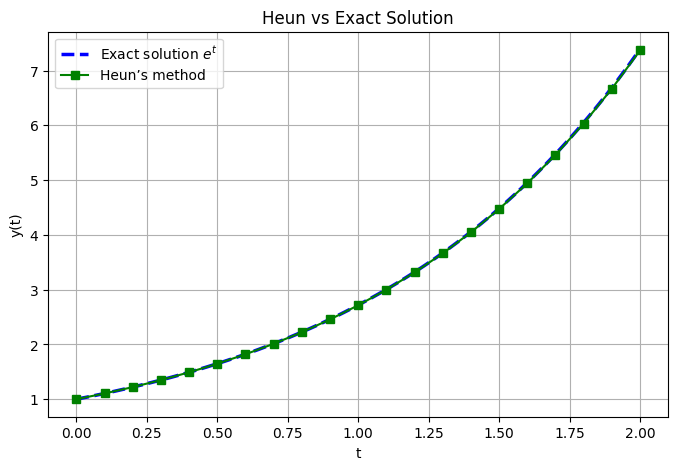

In [5]:
plt.figure(figsize=(8,5))
plt.plot(t_exact, y_exact,"--", linewidth=2.5, label="Exact solution $e^t$", color="blue")
plt.plot(t_heun, y_heun, "s-", label="Heun’s method", color="green")

plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Heun vs Exact Solution")
plt.legend()
plt.grid(True)
plt.show()

## Observations

- Euler’s method tends to underestimate the exponential growth.
- Heun’s method provides a much closer approximation to the exact solution.
- The accuracy of numerical methods improves as we use:
  - Smaller step sizes $h$.
  - Higher-order methods like Heun’s or Runge–Kutta.